# ADA Project - DataBrewers

The aim of this project is to analyze beer preference shifts across seasons and in response to weather changes, events and cultural festivities. This could significantly help professionals (brewers, marketers, etc.) by providing insights into customer preferences. 
By understanding seasonal trends, brewers can adjust their product offerings to align more closely with consumer demand. 
Moreover, as a conclusion of our research, we could suggest the best beer that would be the perfect match for each season/festivity, in the form of a time fresco. 

Our analysis will primarly focus on the reviews published by users based in the United State of America. The reason for this choice is that it is the country were the majority of reviews are done, and it provides us with enough data to conduct our analysis.


For this project, we choose to only use the BeerAdvocate dataset and to discard the RateBeer dataset due to several analytical and practical considerations:
1. **The Herding Effect:** As explained in the paper "When Sheep Shop: Measuring Herding Effects in Product Ratings with Natural Experiments" from Gael Lederrey and Robert West, initial ratings can influence the following ones. By focusing on a single dataset, we can better control for this effect within a single user community. Including RateBeer might introduce inconsistent herding effects that could skew comparative analyses.
2. **Inconsistant Rating Standards:** Both BeerAdvocate and RateBeer communities likely develop their own informal standards for beer ratings. Focusing on a single platform like BeerAdvocate allows dor a more cohesive dataset, with users who rate within the same context, minimizing cross-platform variance.
3. **Data Sufficiency:** The BeerAdvocate dataset provides us with enough reviews and data to perform meaningful analysis and draw reliable insights.

In [1]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'data/matched_beer_data.tar'
with tarfile.open(file_path, 'r') as tar:
    tar.extractall(path='../data')  
    tar.list()

/var/folders/kn/xrv1vh8j0k99dnh2mwl662xc0000gn/T/ipykernel_14982/712133335.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path='../data')


?rwxrwxrwx gayouf/gayouf   26775015 2017-08-10 17:15:37 ratings.csv 
?rw-rw-r-- gayouf/gayouf   99396732 2018-03-19 14:13:29 ratings_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133634318 2018-03-19 14:22:54 ratings_rb.txt.gz 
?rwxrwxrwx gayouf/gayouf     533538 2017-08-08 15:35:54 users_approx.csv 
?rwxrwxrwx gayouf/gayouf     429785 2017-08-07 14:51:08 users.csv 
?rwxrwxrwx gayouf/gayouf   14246582 2018-03-19 14:26:49 beers.csv 
?rwxrwxrwx gayouf/gayouf    1045044 2017-08-02 18:10:05 breweries.csv 
?rw-rw-r-- gayouf/gayouf   77201217 2018-03-20 21:16:35 ratings_with_text_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133632940 2018-03-20 21:25:56 ratings_with_text_rb.txt.gz 


In [3]:
ratings_merged = pd.read_csv('../data/ratings.csv')
ratings_ba = pd.read_csv('../data/ratings_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_rb = pd.read_csv('../data/ratings_rb.txt.gz', compression='gzip', delimiter='\t')
users_approx = pd.read_csv('../data/users_approx.csv')
users_merged = pd.read_csv('../data/users.csv')
beers_merged = pd.read_csv('../data/beers.csv')
breweries_merged = pd.read_csv('../data/breweries.csv')
ratings_with_text_ba = pd.read_csv('../data/ratings_with_text_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_with_text_rb = pd.read_csv('../data/ratings_with_text_rb.txt.gz', compression='gzip', delimiter='\t')

/var/folders/kn/xrv1vh8j0k99dnh2mwl662xc0000gn/T/ipykernel_14982/2344417770.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_merged = pd.read_csv('../data/ratings.csv')
/var/folders/kn/xrv1vh8j0k99dnh2mwl662xc0000gn/T/ipykernel_14982/2344417770.py:6: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  beers_merged = pd.read_csv('../data/beers.csv')


In [4]:
file_path = 'data/BeerAdvocate.tar'
with tarfile.open(file_path, 'r') as tar:
    tar.extractall(path='../data')  
    tar.list()

/var/folders/kn/xrv1vh8j0k99dnh2mwl662xc0000gn/T/ipykernel_14982/806695208.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path='../data')


?rwxrwxrwx gayouf/gayouf   29617210 2017-10-27 18:01:43 beers.csv 
?rwxrwxrwx gayouf/gayouf  729167813 2017-08-03 14:28:54 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    9751813 2017-08-07 13:23:35 users.csv 
?rwxrwxrwx gayouf/gayouf     808192 2017-08-04 18:22:30 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926302646 2017-08-03 14:29:24 ratings.txt.gz 


In [5]:
beers_ba = pd.read_csv('../data/beers.csv')
reviews_ba = pd.read_csv('../data/reviews.txt.gz', header=None, names=["info"], delimiter='\t', on_bad_lines='skip')
users_ba = pd.read_csv('../data/users.csv')
breweries_ba = pd.read_csv('../data/breweries.csv')
ratings_ba = pd.read_csv('../data/ratings.txt.gz',header=None, names=["info"], delimiter='\t', on_bad_lines='skip')

In [6]:
# Add review_id based on 16-row structure 
reviews_ba['review_id'] = reviews_ba.index // 16

# Split key-value pairs and filter valid splits
split_data_ba = reviews_ba['info'].str.split(': ', n=1, expand=True)
split_data_ba = split_data_ba[split_data_ba[1].notna()]  # Remove rows with no :

# Assign key and value columns
reviews_ba[['key', 'value']] = split_data_ba

# Pivot the table to convert key to a column
reviews_ba = reviews_ba.pivot(index='review_id', columns='key', values='value').reset_index(drop=True)
reviews_ba.head()

key,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
0,4.5,3.25,2.75,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),1440064800,3.0,3.25,2.88,Euro Pale Lager,2.75,"From a bottle, pours a piss yellow color with ...",nmann08.184925,nmann08
1,4.5,3.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1235127600,3.5,3.5,3.67,English Pale Ale,4.0,Pours pale copper with a thin head that quickl...,stjamesgate.163714,StJamesGate
2,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1142247600,3.5,3.5,3.73,English Pale Ale,4.0,"500ml Bottle bought from The Vintage, Antrim.....",mdagnew.19527,mdagnew
3,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1101898800,4.5,4.0,3.98,English Pale Ale,4.0,Serving: 500ml brown bottlePour: Good head wit...,helloloser12345.10867,helloloser12345
4,4.5,4.0,4.0,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1093860000,4.0,4.0,4.00,English Pale Ale,4.0,"500ml bottlePours with a light, slightly hazy ...",cypressbob.3708,cypressbob


In [7]:
# We prompt the number of beers in the dataset
print("Number of beers in the dataset: ", len(beers_ba))

# We prompt the numbers of ratings in the dataset using the nbr_ratings column of the beers dataset and summing them
print("Number of ratings in the dataset: ", beers_ba['nbr_ratings'].sum())

# We prompt the number of reviews in the dataset using the nbr_reviews column of the beers dataset and summing them
print("Number of reviews in the dataset: ", beers_ba['nbr_reviews'].sum())

# We only keep users from the US
# We discard users whose location is NaN
users_us = users_ba.dropna(subset=['location'])

# We prompt the number of ratings made by US users using the nb_ratings column of the users dataset and summing them for users where location is contains United States 
print("Number of ratings made by US users: ", users_us[users_us['location'].str.contains('United States')]['nbr_ratings'].sum())

# We prompt the number of reviews made by US users using the nb_reviews column of the users dataset and summing them for users where location is contains United States
print("Number of reviews made by US users: ", users_us[users_us['location'].str.contains('United States')]['nbr_reviews'].sum())

Number of beers in the dataset:  280823
Number of ratings in the dataset:  8393032
Number of reviews in the dataset:  2589586
Number of ratings made by US users:  7303870
Number of reviews made by US users:  2241334


In [8]:
# We only keep users from the us and we discard users whose location is NaN
users_us = users_ba.dropna(subset=['location'])
users_us = users_us[users_us['location'].str.contains('United States')]

# We create a new column that will only contain the state of the user
users_us['state'] = users_us['location'].str.split(',').str[1]

# We prompt the number of users per state
print("Number of users per state: ", users_us['state'].value_counts())

Number of users per state:  state
California        11638
Pennsylvania       8689
New York           7432
Illinois           6866
Massachusetts      6658
Texas              5893
Ohio               4776
Florida            4604
Michigan           4213
New Jersey         3716
Virginia           3604
North Carolina     3405
Washington         2891
Minnesota          2854
Connecticut        2792
Indiana            2644
Georgia            2633
Wisconsin          2375
Maryland           2335
Colorado           2326
Missouri           1703
Oregon             1629
Arizona            1317
South Carolina     1309
Tennessee          1308
Kentucky           1203
New Hampshire      1171
Alabama            1026
Iowa               1010
Maine               888
Vermont             779
Rhode Island        778
Oklahoma            736
Louisiana           732
Kansas              728
Nebraska            496
Nevada              470
Delaware            435
Arkansas            427
West Virginia       375
New Me

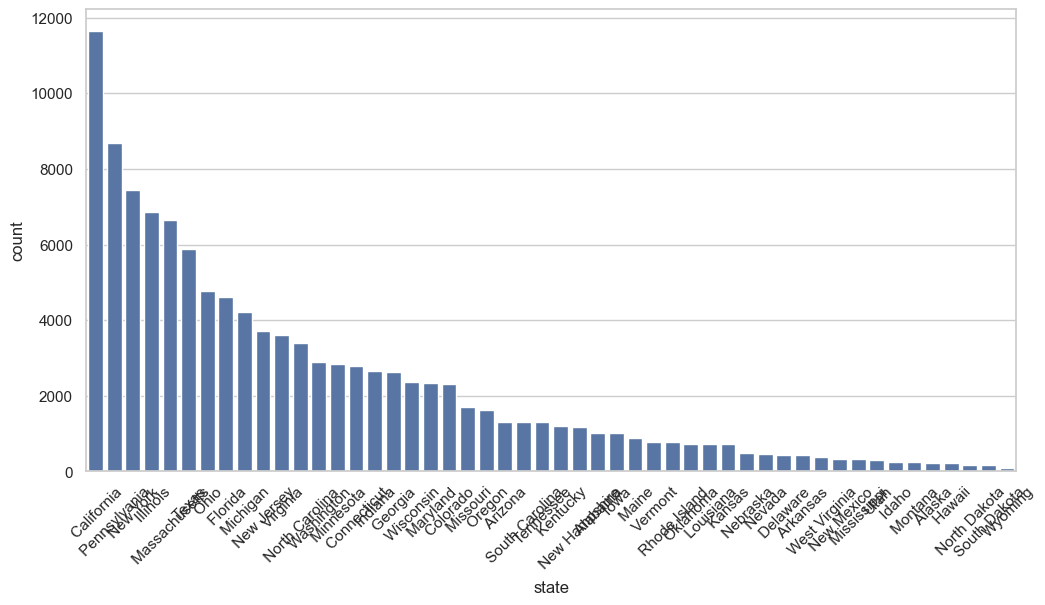

In [9]:
# We prompt the number of users per state using a bar plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(data=users_us, x='state', order = users_us['state'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [17]:
# We merge the reviews dataset with the users dataset
reviews_us = reviews_ba.merge(users_us, left_on='user_id', right_on='user_id')

In [30]:
# We drop the rows where the rating is NaN
reviews_usa = reviews_us.dropna(subset=['overall'])
# We drop the columns abv, beer_id, beer_name, brewery_id, brewery_name, review_id, review_text, and location
reviews_usa = reviews_usa.drop(columns=['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'location', 'rating', 'text', 'user_id', 'user_name_x', 'user_name_y', 'joined'])
reviews_usa.head()

,abv,appearance,aroma,date,overall,palate,style,taste,nbr_ratings,nbr_reviews,state
0,4.5,3.25,2.75,1440064800,3.0,3.25,Euro Pale Lager,2.75,7820,465,Washington
1,4.5,3.0,3.5,1235127600,3.5,3.5,English Pale Ale,4.0,2521,2504,New York
2,4.8,4.25,4.5,1360753200,3.75,3.25,English Pale Ale,3.75,264,95,North Carolina
3,4.8,4.0,3.75,1357729200,3.75,3.5,English Pale Ale,3.5,2314,1990,New York
4,4.8,3.0,3.5,1353150000,2.5,2.5,English Pale Ale,2.5,585,389,Illinois


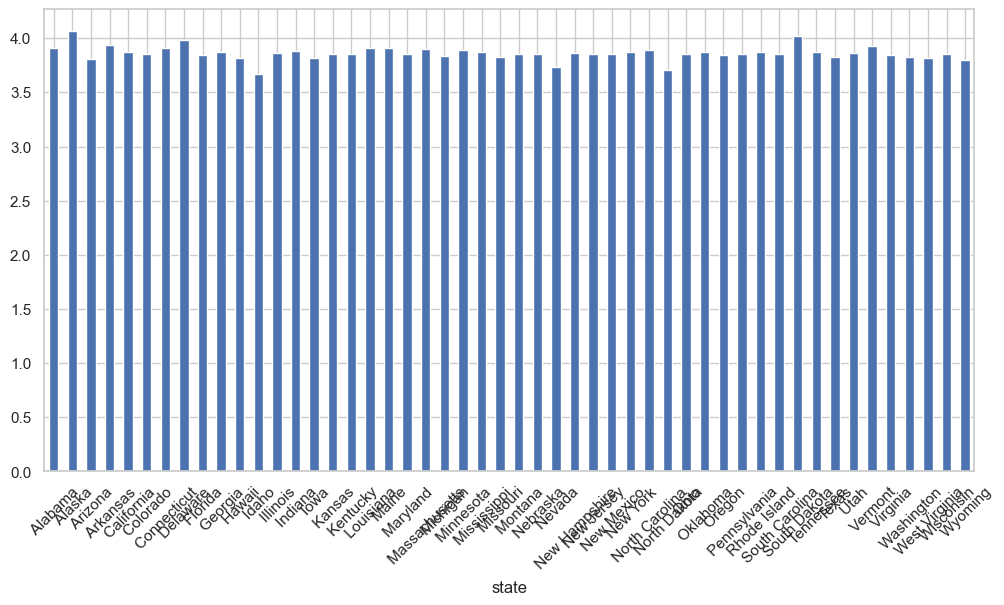

In [31]:
# We prompt the mean rating per state
# Convert 'overall' to numeric, setting invalid parsing to NaN
reviews_usa['overall'] = pd.to_numeric(reviews_usa['overall'], errors='coerce')
mean_rating_per_state = reviews_usa.groupby('state')['overall'].mean()

# We plot the mean rating per state
plt.figure(figsize=(12,6))
mean_rating_per_state.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

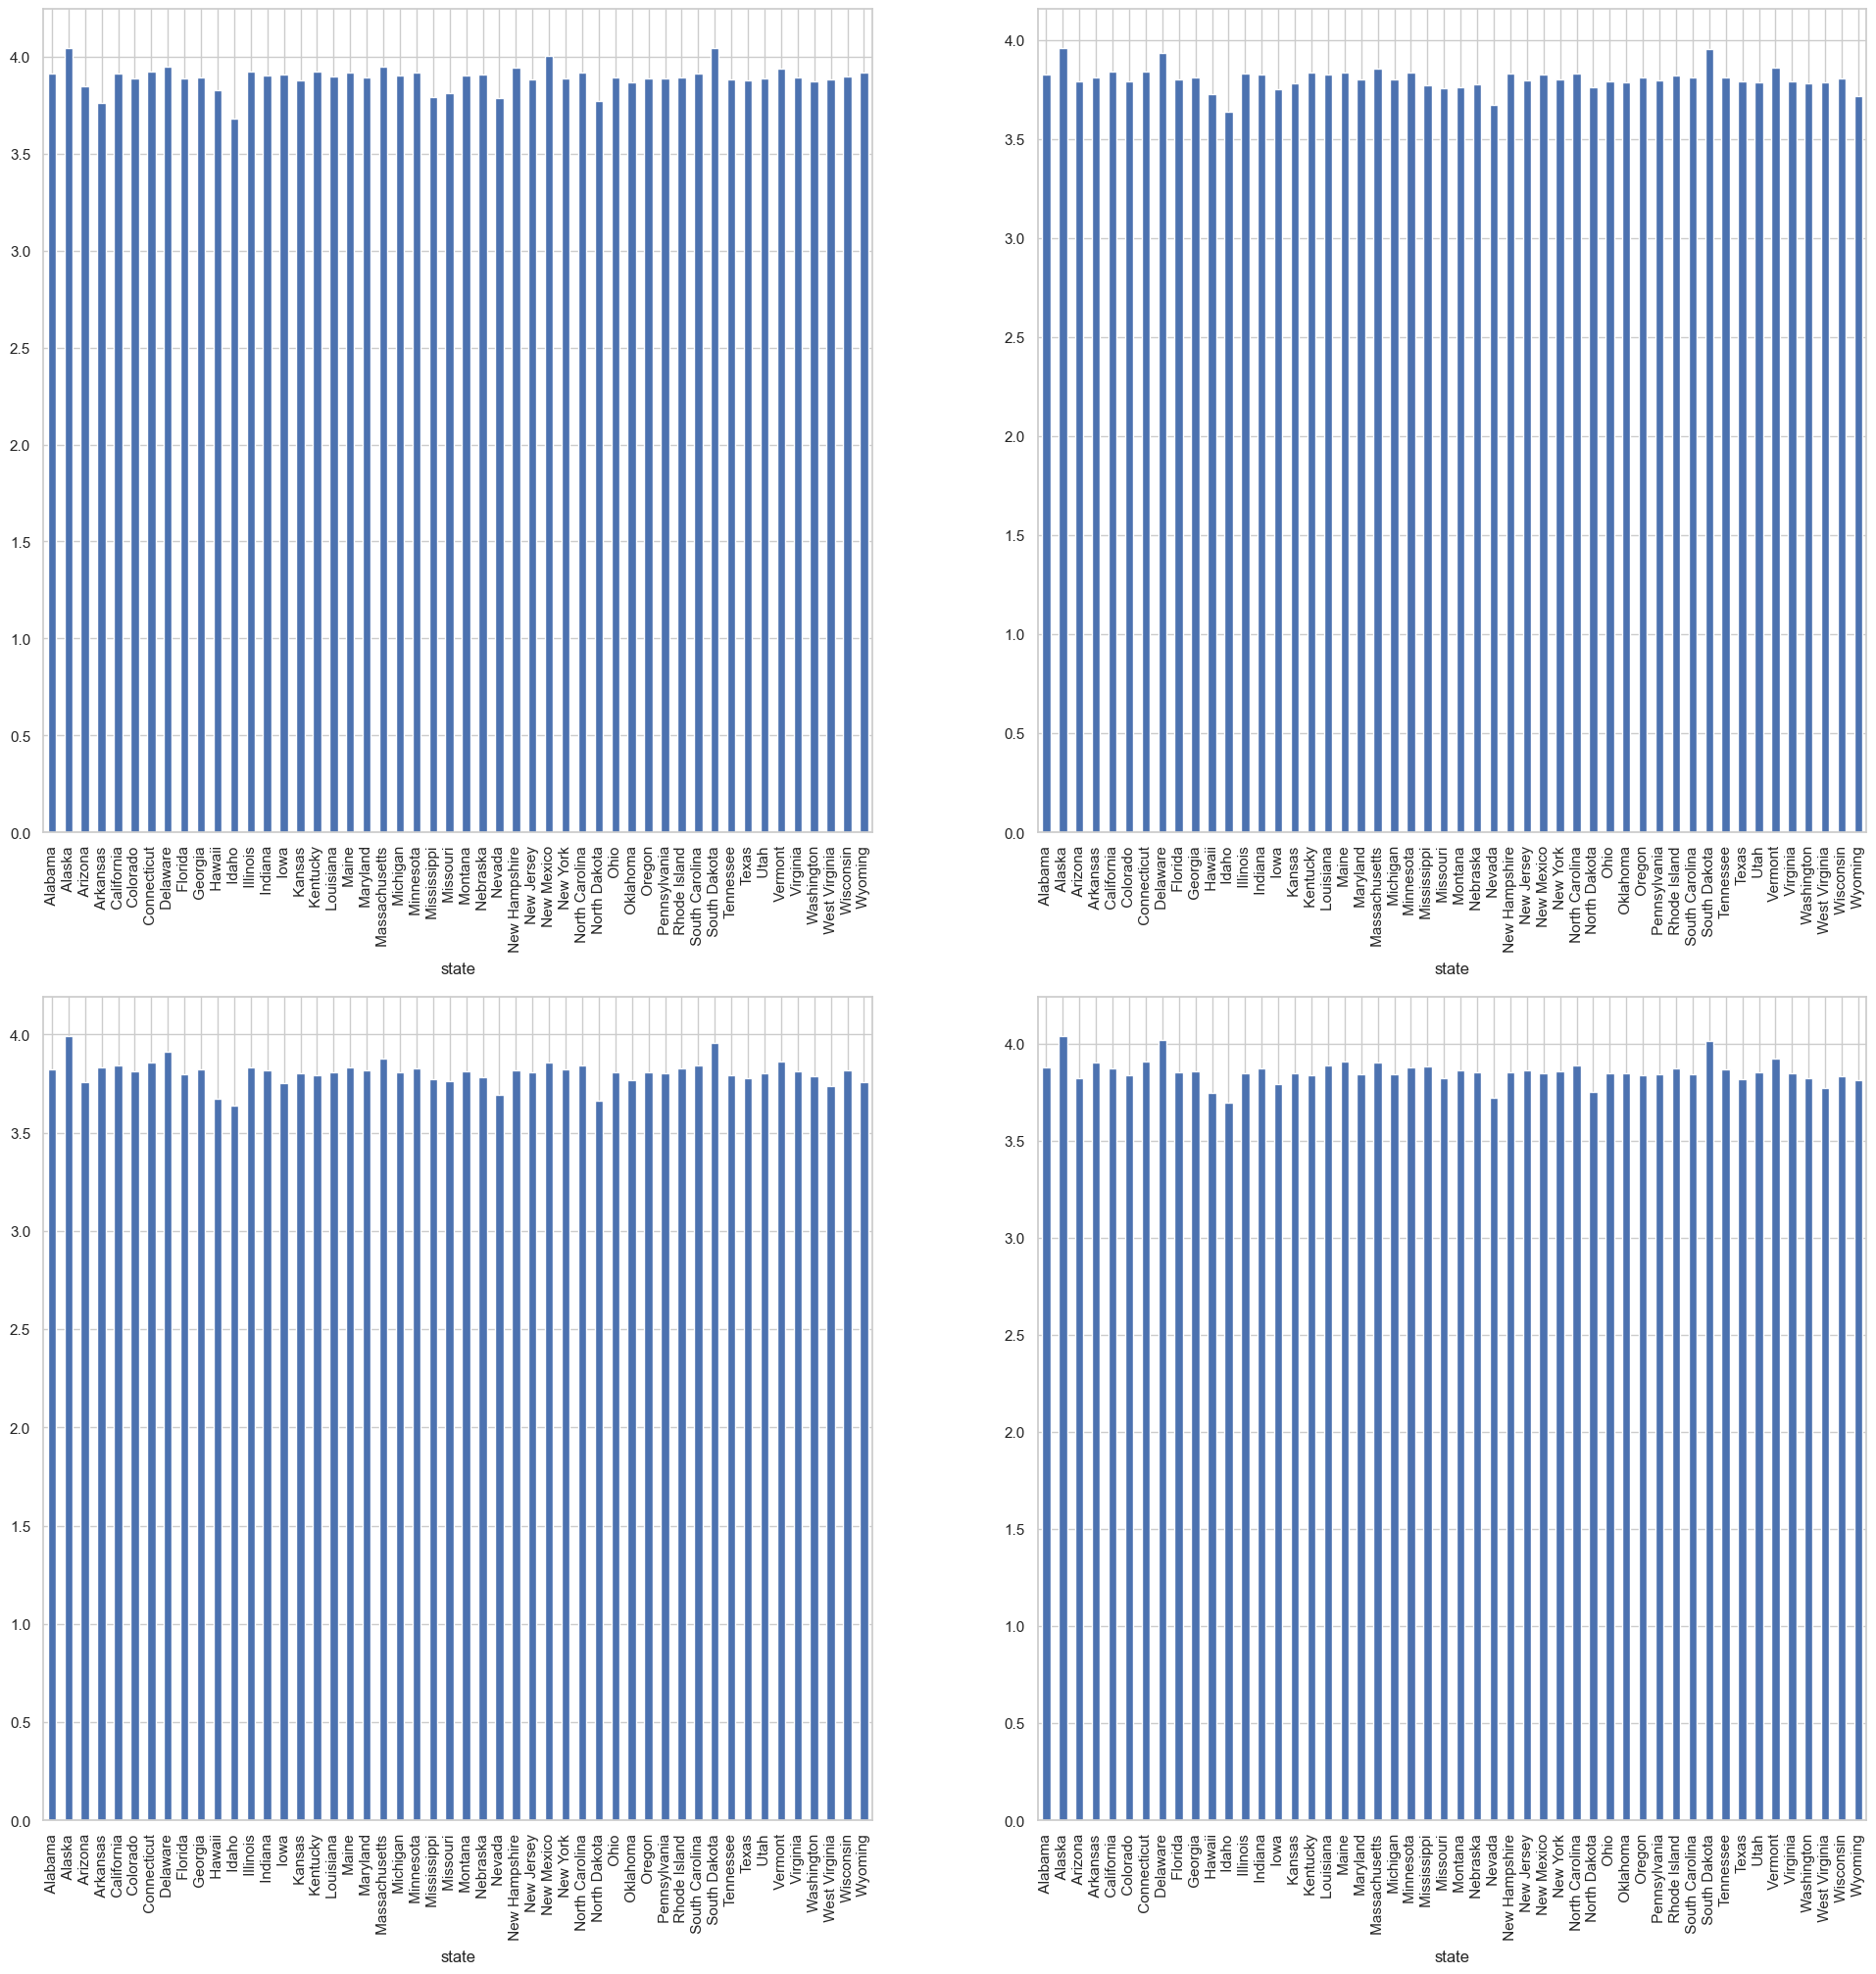

In [37]:
# We now prompt the mean ratings for each of appearance, aroma, palate and taste by state
# Convert 'appearance', 'aroma', 'palate', 'taste' to numeric, setting invalid parsing to NaN
reviews_usa['appearance'] = pd.to_numeric(reviews_usa['appearance'], errors='coerce')
reviews_usa['aroma'] = pd.to_numeric(reviews_usa['aroma'], errors='coerce')
reviews_usa['palate'] = pd.to_numeric(reviews_usa['palate'], errors='coerce')
reviews_usa['taste'] = pd.to_numeric(reviews_usa['taste'], errors='coerce')

mean_appearance = reviews_usa.groupby('state')['appearance'].mean()
mean_aroma = reviews_usa.groupby('state')['aroma'].mean()
mean_palate = reviews_usa.groupby('state')['palate'].mean()
mean_taste = reviews_usa.groupby('state')['taste'].mean()

# We plot the mean ratings for each of appearance, aroma, palate and taste by state in 4 different plots
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
mean_appearance.plot(kind='bar', ax=axs[0, 0])
mean_aroma.plot(kind='bar', ax=axs[0, 1])
mean_palate.plot(kind='bar', ax=axs[1, 0])
mean_taste.plot(kind='bar', ax=axs[1, 1])
plt.show()

What is interesting is that we can see that the change in ratings among states are almost identical for each of the category of ratings

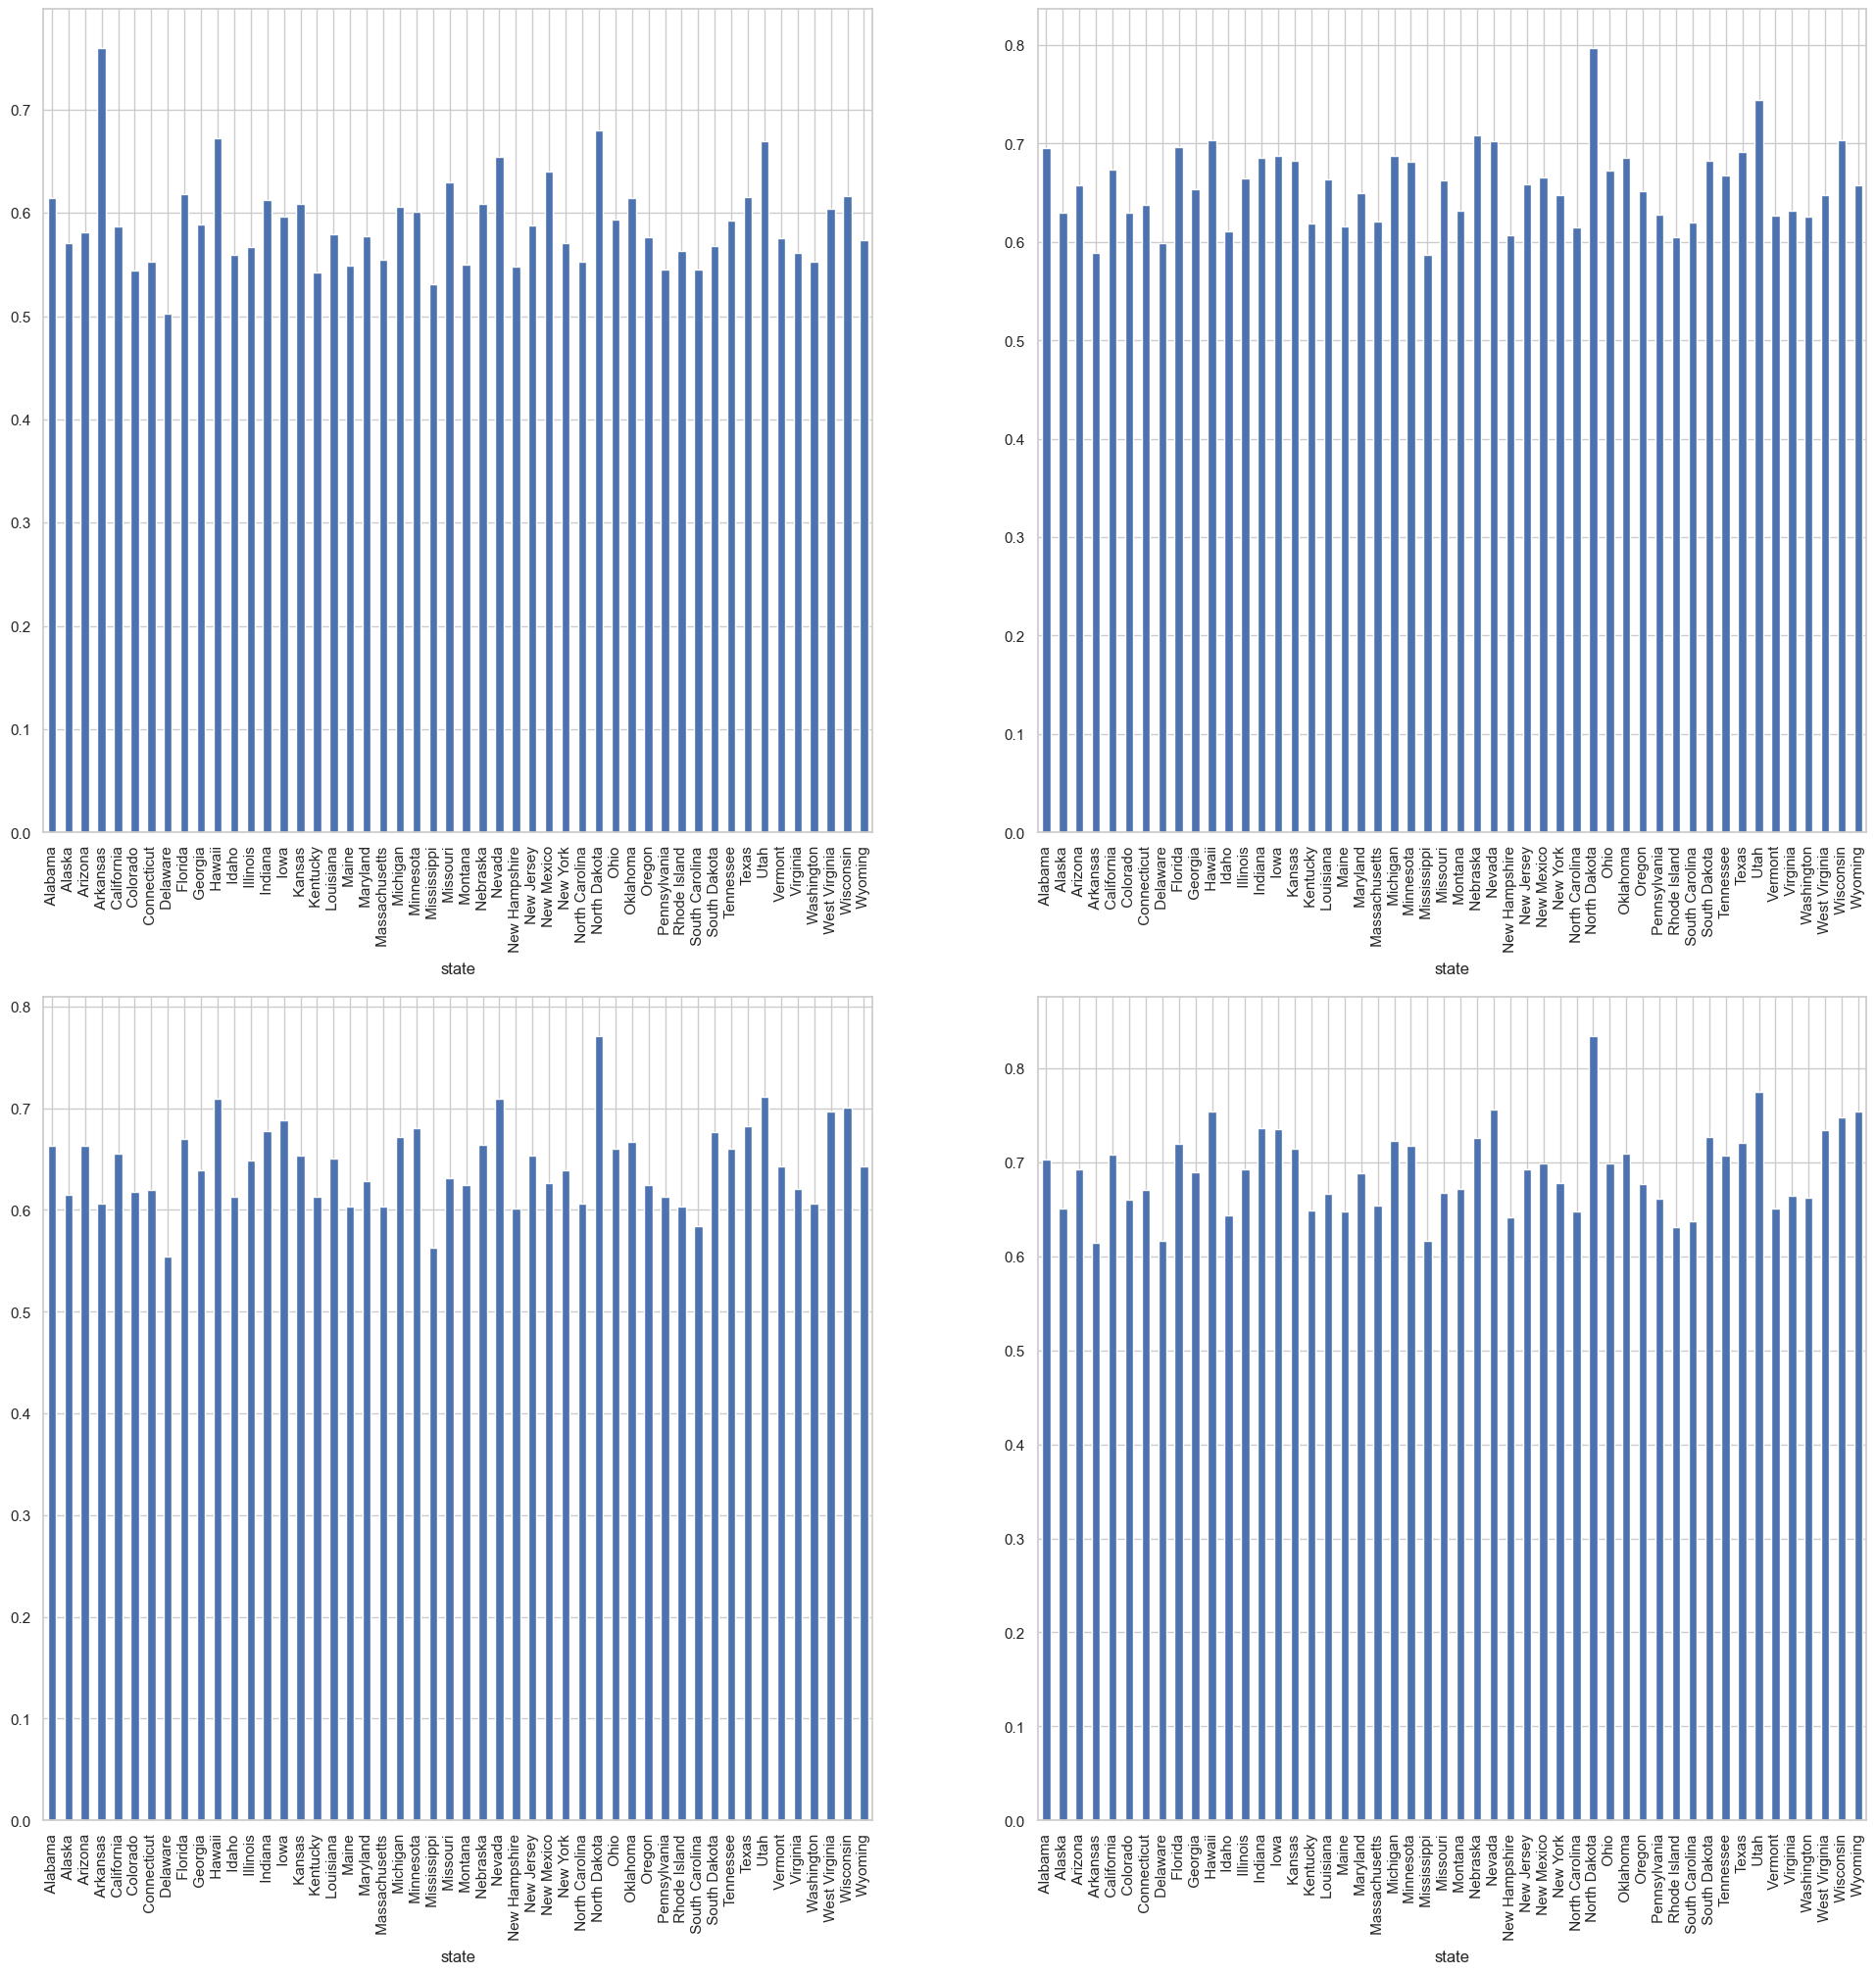

In [39]:
# For each state we evaluate the variation of grade between the 4 categories
# We calculate the standard deviation of the ratings for each state
std_appearance = reviews_usa.groupby('state')['appearance'].std()
std_aroma = reviews_usa.groupby('state')['aroma'].std()
std_palate = reviews_usa.groupby('state')['palate'].std()
std_taste = reviews_usa.groupby('state')['taste'].std()

# We plot the standard deviation of the ratings for each state
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
std_appearance.plot(kind='bar', ax=axs[0, 0])
std_aroma.plot(kind='bar', ax=axs[0, 1])
std_palate.plot(kind='bar', ax=axs[1, 0])
std_taste.plot(kind='bar', ax=axs[1, 1])
plt.show()

